In [11]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Traits vs Career

In [13]:
career_prediction_dataset = pd.read_csv("Data_final.csv")

In [14]:
career_prediction_dataset

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher
...,...,...,...,...,...,...,...,...,...,...,...
100,7.67,8.23,6.01,9.12,5.45,4.45,2.89,3.12,4.67,8.34,Foreign Service Officer
101,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,Customs and Border Protection Officer
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,Civil Engineer
103,7.34,7.67,4.23,5.23,4.67,9.34,8.45,6.78,8.12,5.67,Robotics Engineer


In [15]:
career_prediction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.2+ KB


In [16]:
career_prediction_dataset["Career"]

0                                 Accountant
1                           Graphic Designer
2                                Salesperson
3                         Research Scientist
4                                    Teacher
                       ...                  
100                  Foreign Service Officer
101    Customs and Border Protection Officer
102                           Civil Engineer
103                        Robotics Engineer
104              Electronics Design Engineer
Name: Career, Length: 105, dtype: object

In [17]:
careers = 'Career'

professions = career_prediction_dataset[careers].tolist()

print(professions)


['Accountant', 'Graphic Designer', 'Salesperson', 'Research Scientist', 'Teacher', 'Architect', 'Nurse', 'Software Developer', 'Psychologist', 'Chef', 'Marketing Manager', 'Physician', 'Artist', 'Human Resources Manager', 'Construction Engineer', 'Journalist', 'Astronomer', 'Financial Analyst', 'Biologist', 'Event Planner', 'Real Estate Agent', 'Environmental Scientist', 'Lawyer', 'IT Support Specialist', 'Fashion Designer', 'Marketing Coordinator', 'Biomedical Engineer', 'Event Photographer', 'Data Analyst', 'Pharmacist', 'Social Worker', 'Financial Planner', 'Biotechnologist', 'HR Recruiter', 'Software Quality Assurance Tester', 'Elementary School Teacher', 'Industrial Engineer', 'Market Research Analyst', 'Financial Auditor', 'Musician', 'Police Detective', 'Marketing Copywriter', 'Zoologist', 'Speech Therapist', 'Mechanical Engineer', 'Forensic Scientist', 'Social Media Manager', 'Geologist', 'Web Developer', 'Wildlife Biologist', 'Air Traffic Controller', 'Game Developer', 'Urban 

In [18]:
def find_engineers(professions):
    engineer_professions = set()
    for profession in professions:
        normalized_profession = profession.strip().lower()
        if "engineer" in normalized_profession:
            engineer_professions.add(profession.strip())
    return engineer_professions

# Get the engineer professions
engineer_professions = find_engineers(professions)

# Print the results
print("Engineer professions set:", engineer_professions)


Engineer professions set: {'Aerospace Engineer', 'Electronics Design Engineer', 'Civil Engineer', 'Industrial Engineer', 'Environmental Engineer', 'Mechanical Engineer', 'Electrical Engineer', 'Robotics Engineer', 'Construction Engineer', 'Biomedical Engineer'}


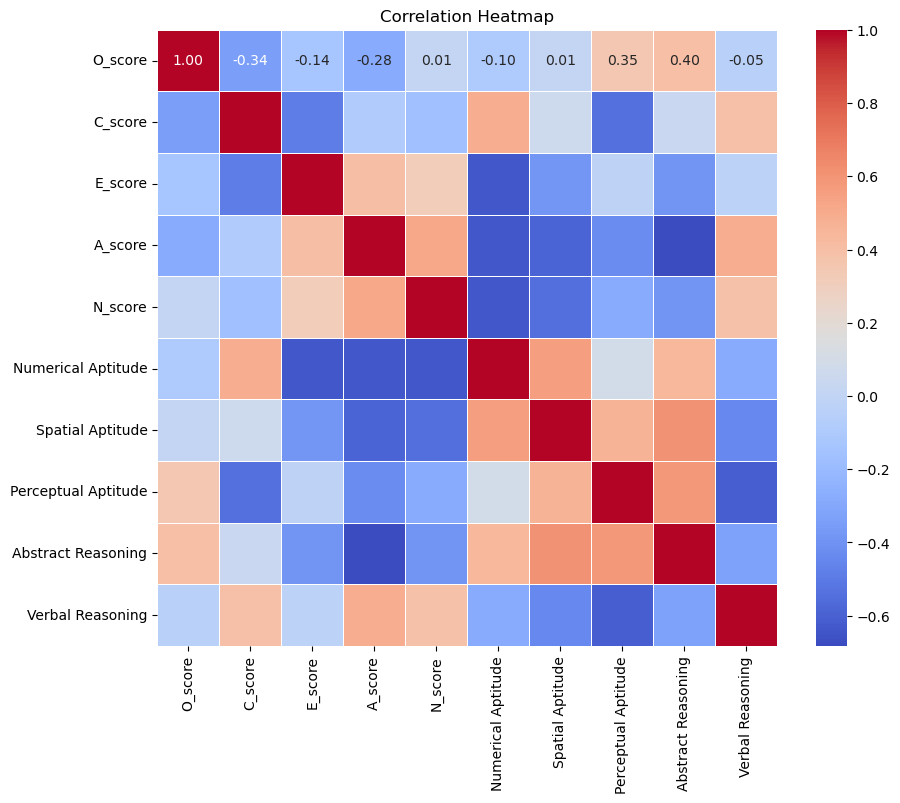

In [19]:
# Select only numeric columns
numeric_dataset = career_prediction_dataset.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

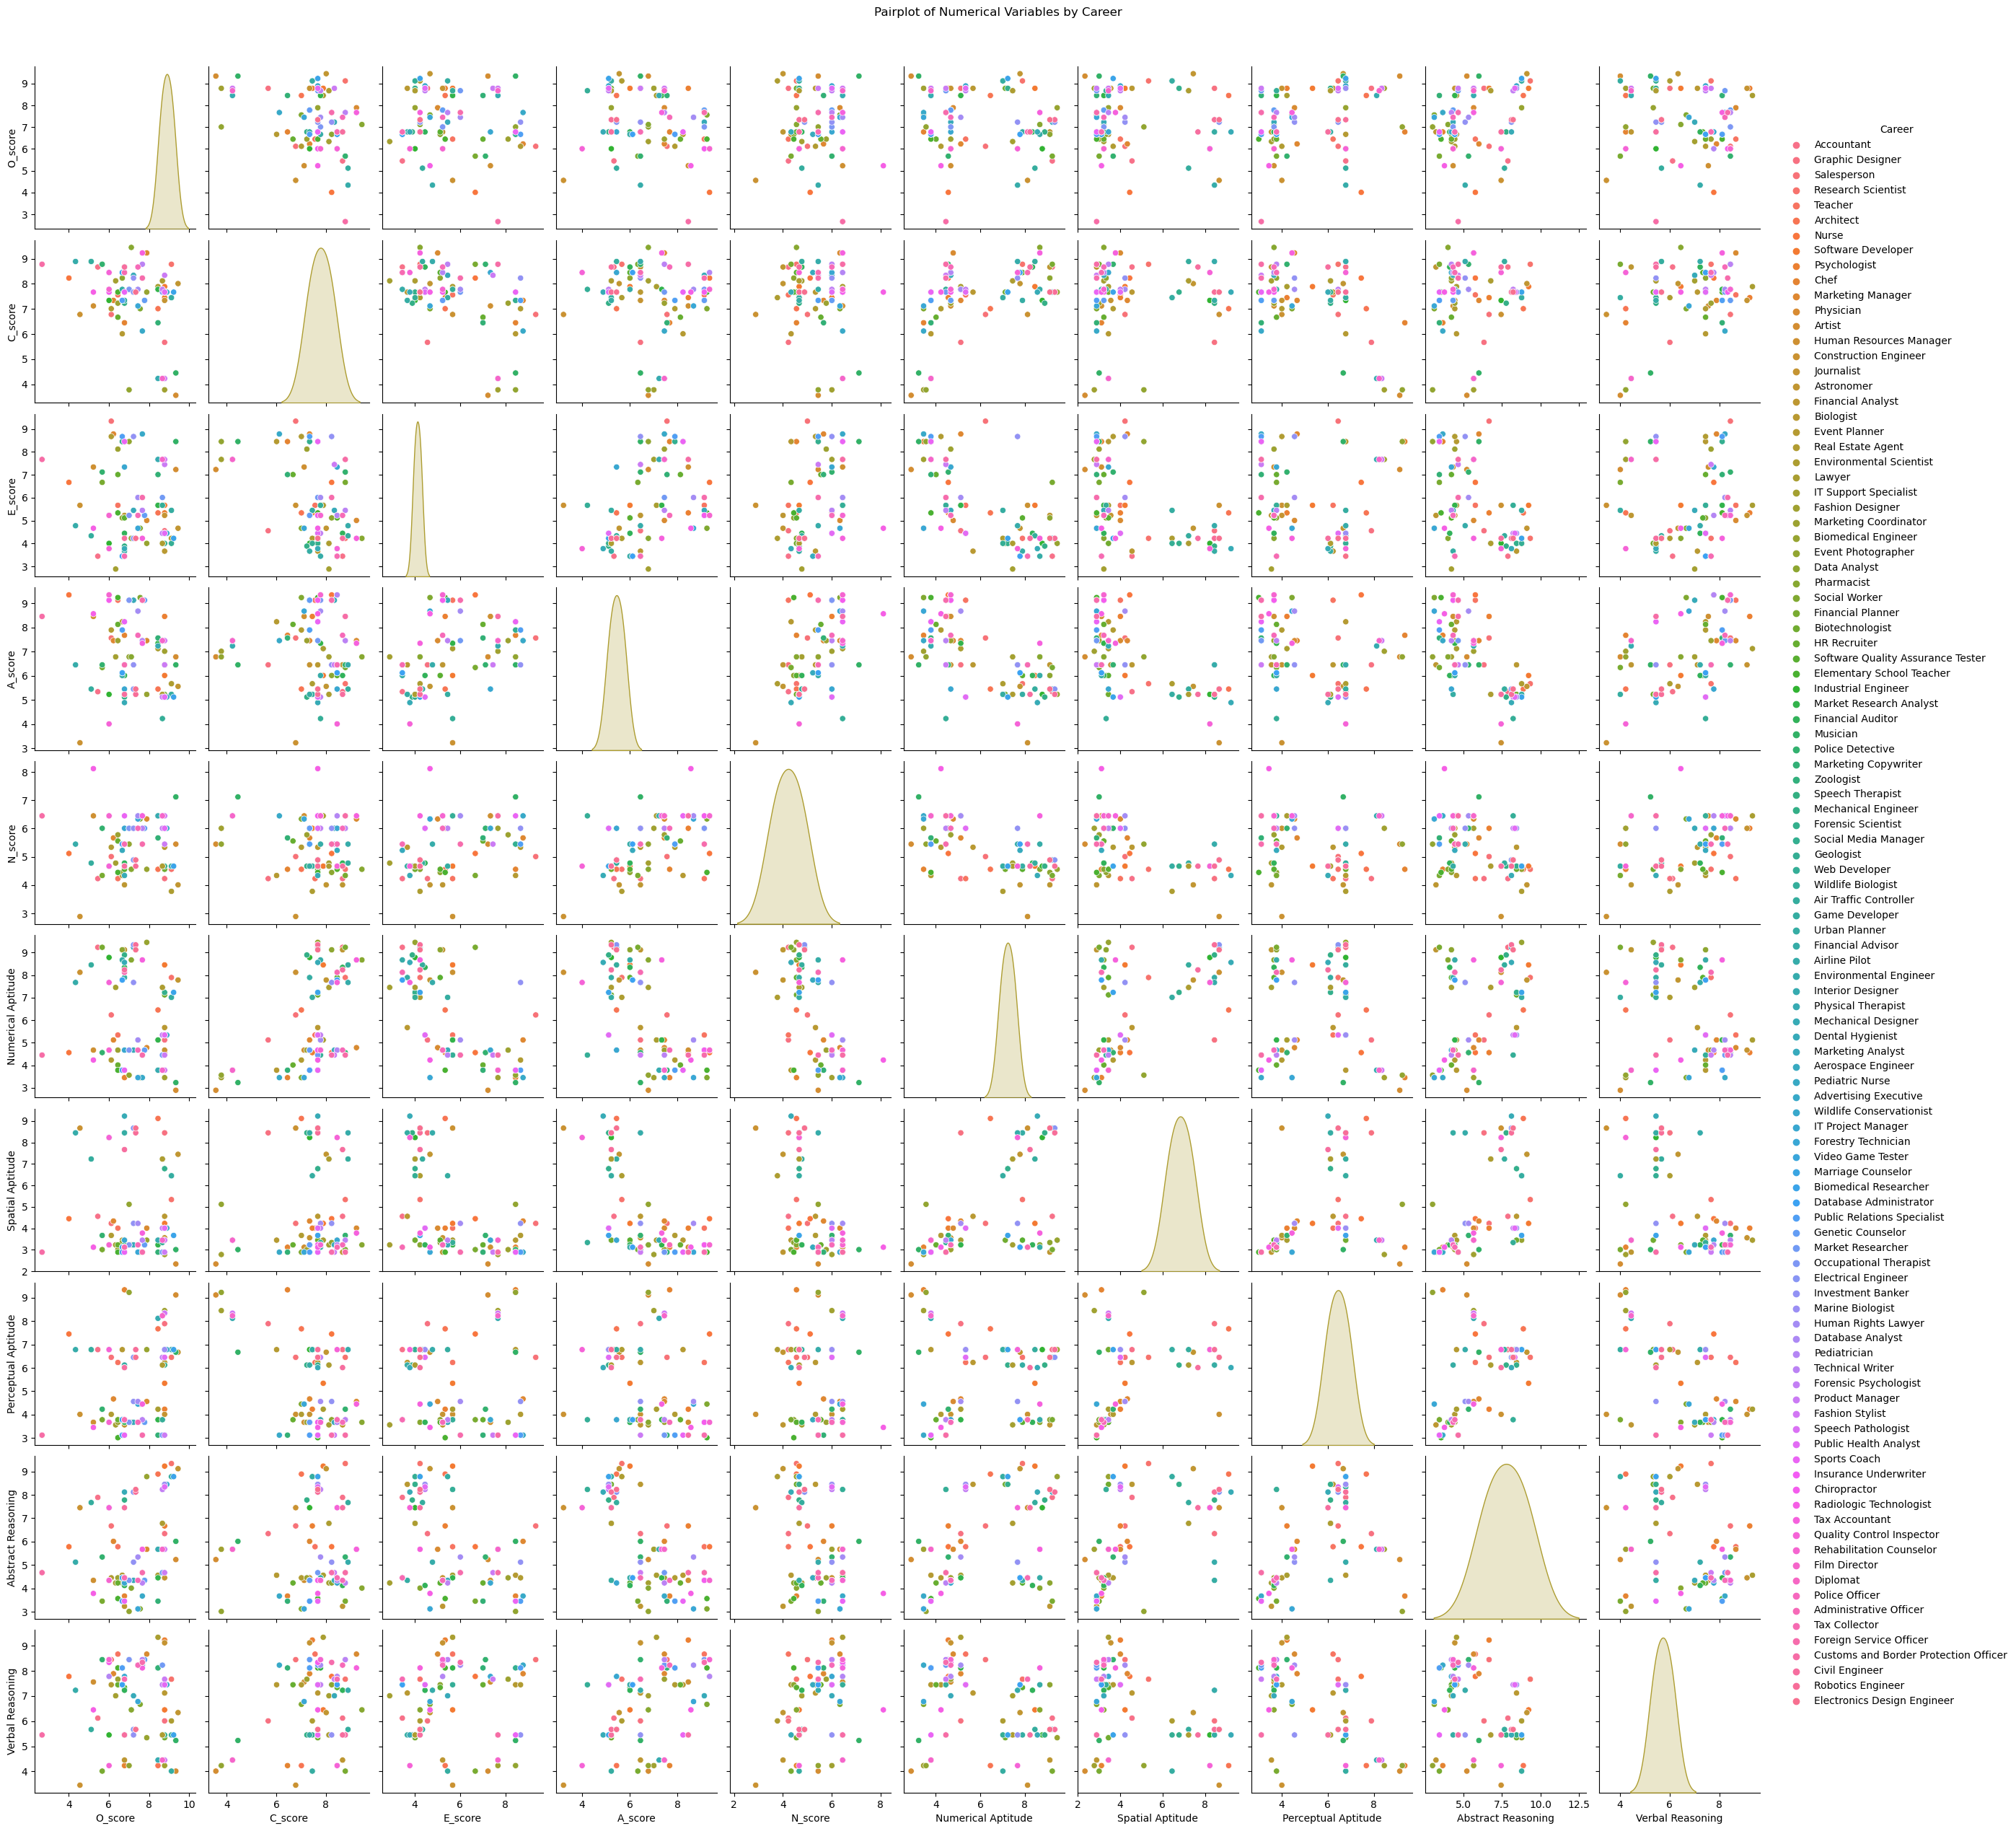

In [20]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(career_prediction_dataset, hue='Career', palette='husl')
plt.suptitle('Pairplot of Numerical Variables by Career', y=1.02)
plt.show()

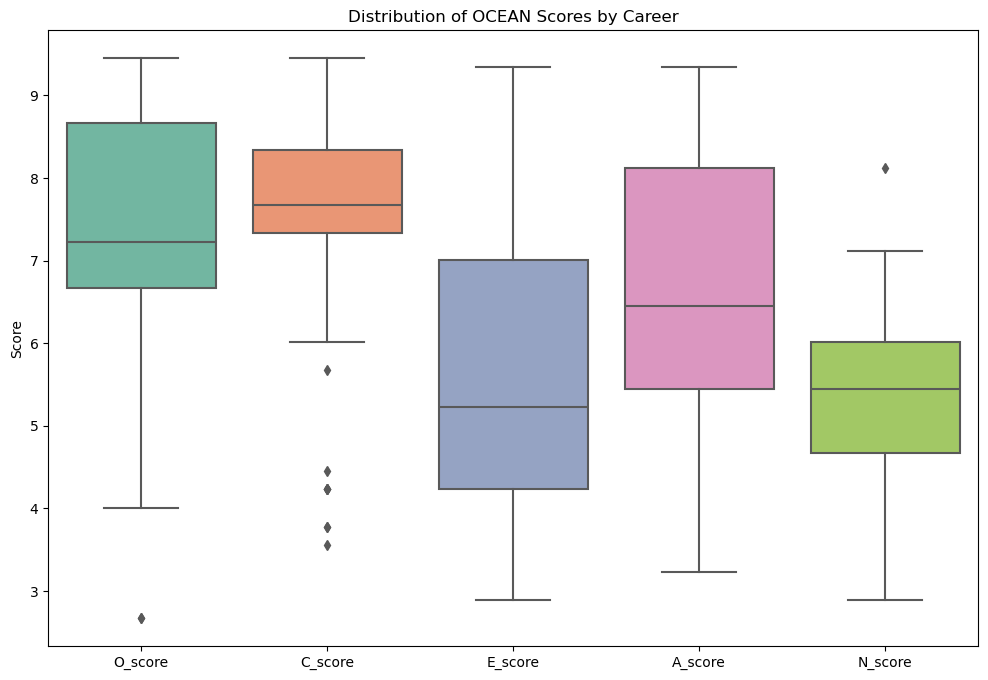

In [21]:
# Boxplot to visualize distribution of OCEAN scores by Career
plt.figure(figsize=(12, 8))
sns.boxplot(data = career_prediction_dataset.drop(columns=['Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude', 'Abstract Reasoning', 'Verbal Reasoning']), palette='Set2')
plt.title('Distribution of OCEAN Scores by Career')
plt.ylabel('Score')
plt.show()

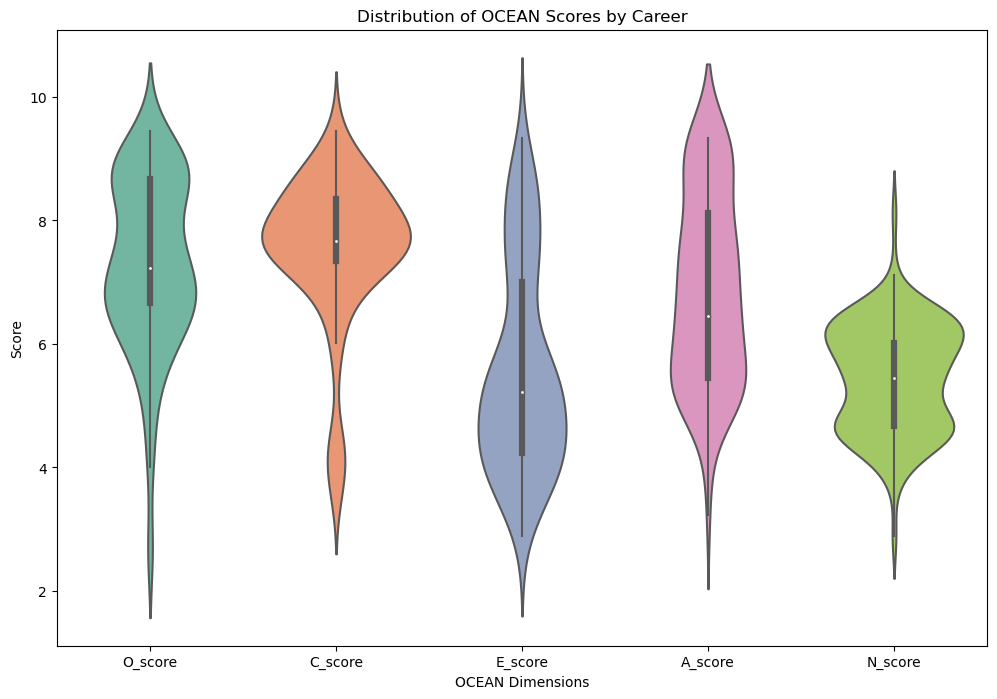

In [22]:
# Violin plot to visualize distribution of OCEAN scores by Career
plt.figure(figsize = (12, 8))
sns.violinplot(data = career_prediction_dataset.drop(columns=['Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude', 'Abstract Reasoning', 'Verbal Reasoning']), palette='Set2')
plt.title('Distribution of OCEAN Scores by Career')
plt.ylabel('Score')
plt.xlabel('OCEAN Dimensions')
plt.show()

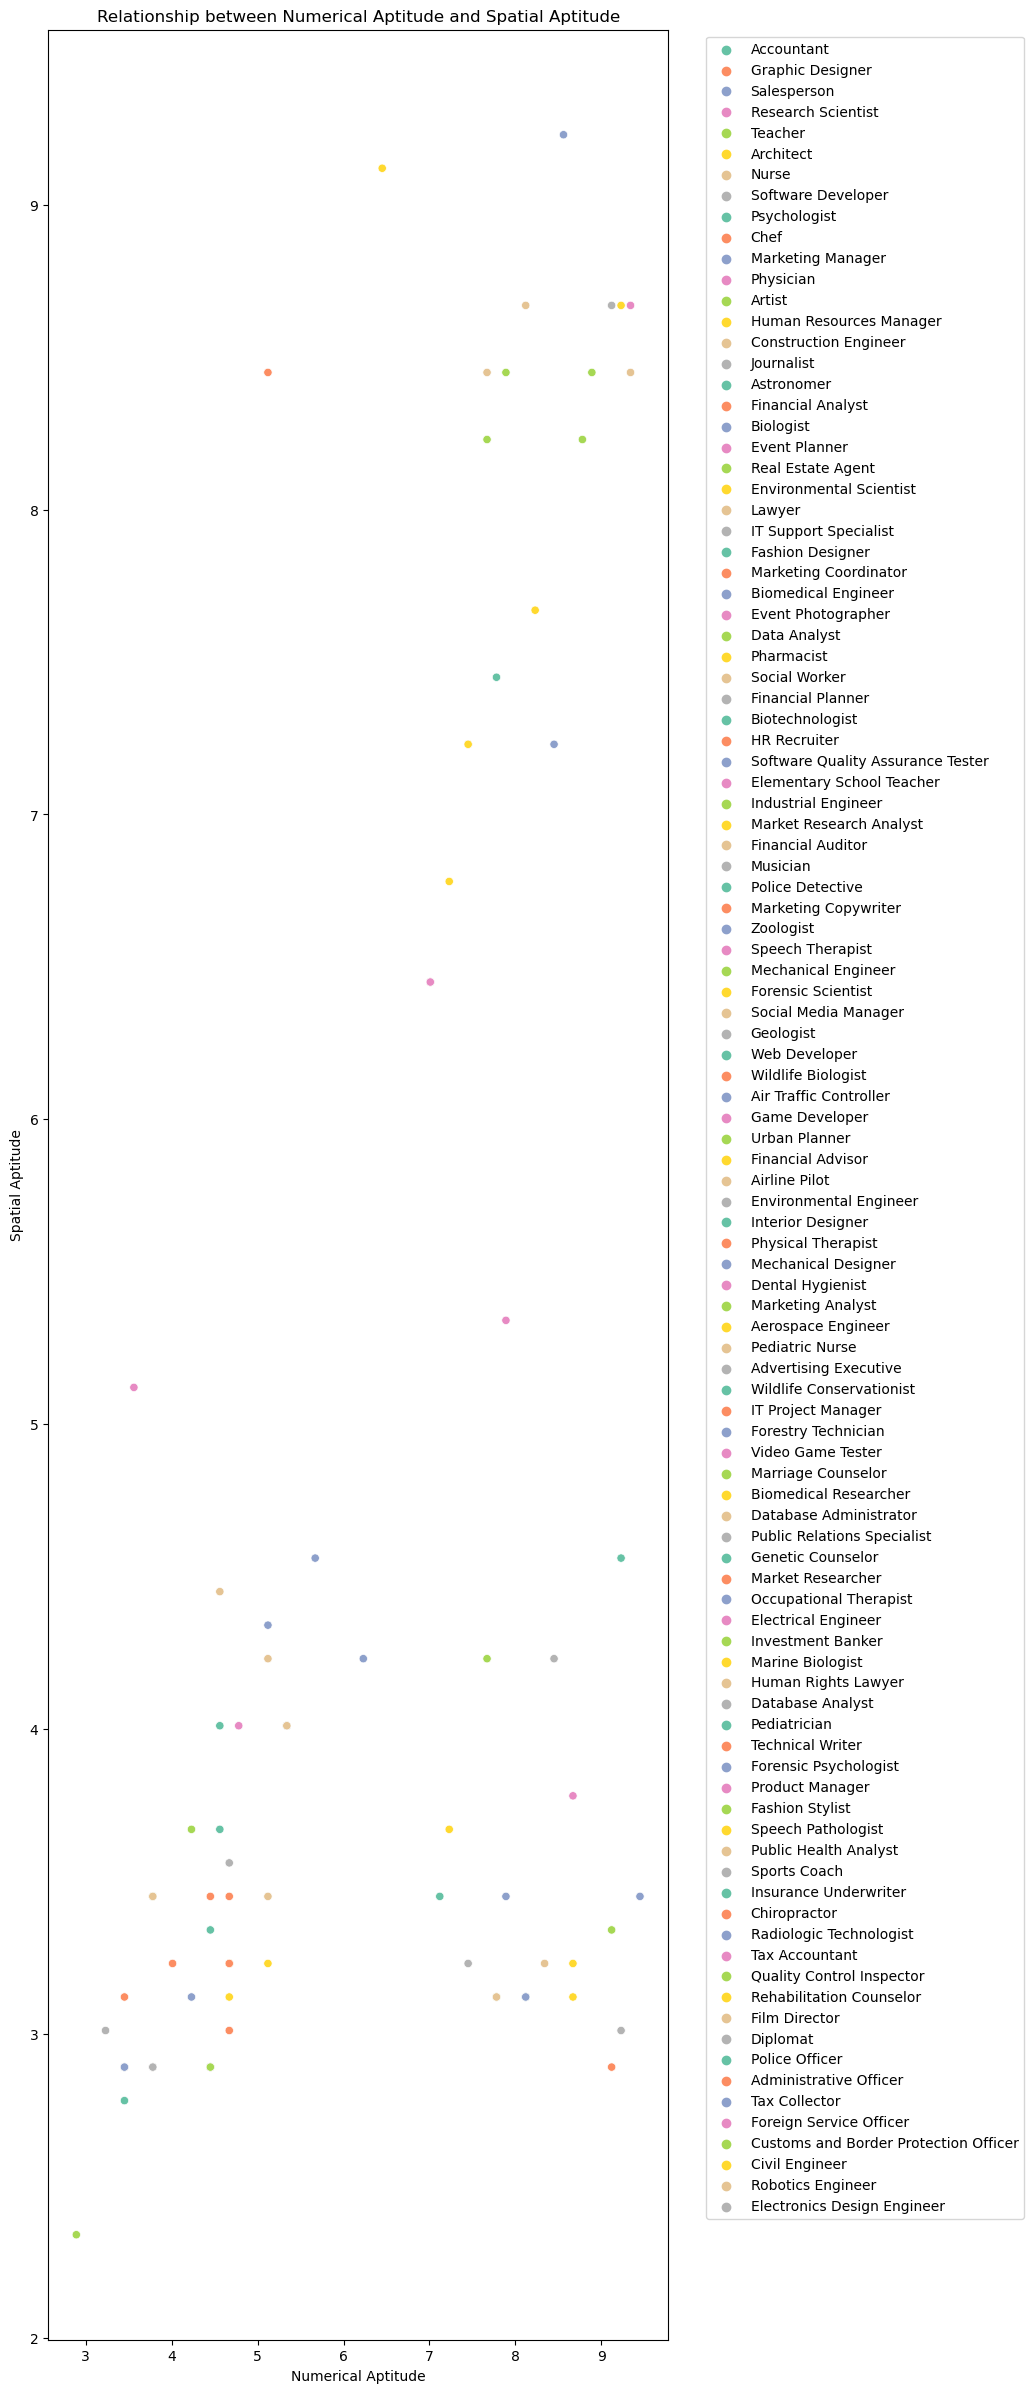

In [23]:
# Scatter plot to visualize relationship between Numerical Aptitude and Spatial Aptitude
plt.figure(figsize = (8, 30))
sns.scatterplot(x = 'Numerical Aptitude', y = 'Spatial Aptitude', data = career_prediction_dataset, hue = 'Career', palette = 'Set2')
plt.title('Relationship between Numerical Aptitude and Spatial Aptitude')
plt.xlabel('Numerical Aptitude')
plt.ylabel('Spatial Aptitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [24]:
word = 'Engineer'
filtered_df = career_prediction_dataset[career_prediction_dataset['Career'].str.contains(word, case=False, na=False)]

# Step 3: Create a new dataset with the filtered rows
new_dataset = filtered_df

# Display the new dataset
print(new_dataset)

     O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
14      4.56     6.78     5.67     3.23     2.89                8.12   
26      7.89     7.67     4.01     5.23     4.56                9.45   
36      6.01     7.34     4.01     5.23     4.67                8.78   
44      6.78     7.23     3.89     5.12     4.67                8.89   
55      8.67     8.12     4.01     5.23     4.67                7.45   
61      7.23     7.67     4.23     5.45     4.89                9.23   
76      7.23     7.67     4.23     5.45     4.89                9.34   
102     6.78     8.67     4.23     5.23     4.67                8.23   
103     7.34     7.67     4.23     5.23     4.67                9.34   
104     7.34     7.67     4.23     5.45     4.89                9.12   

     Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
14               8.67                 4.01                7.45   
26               3.45                 6.78                8.78   
36       

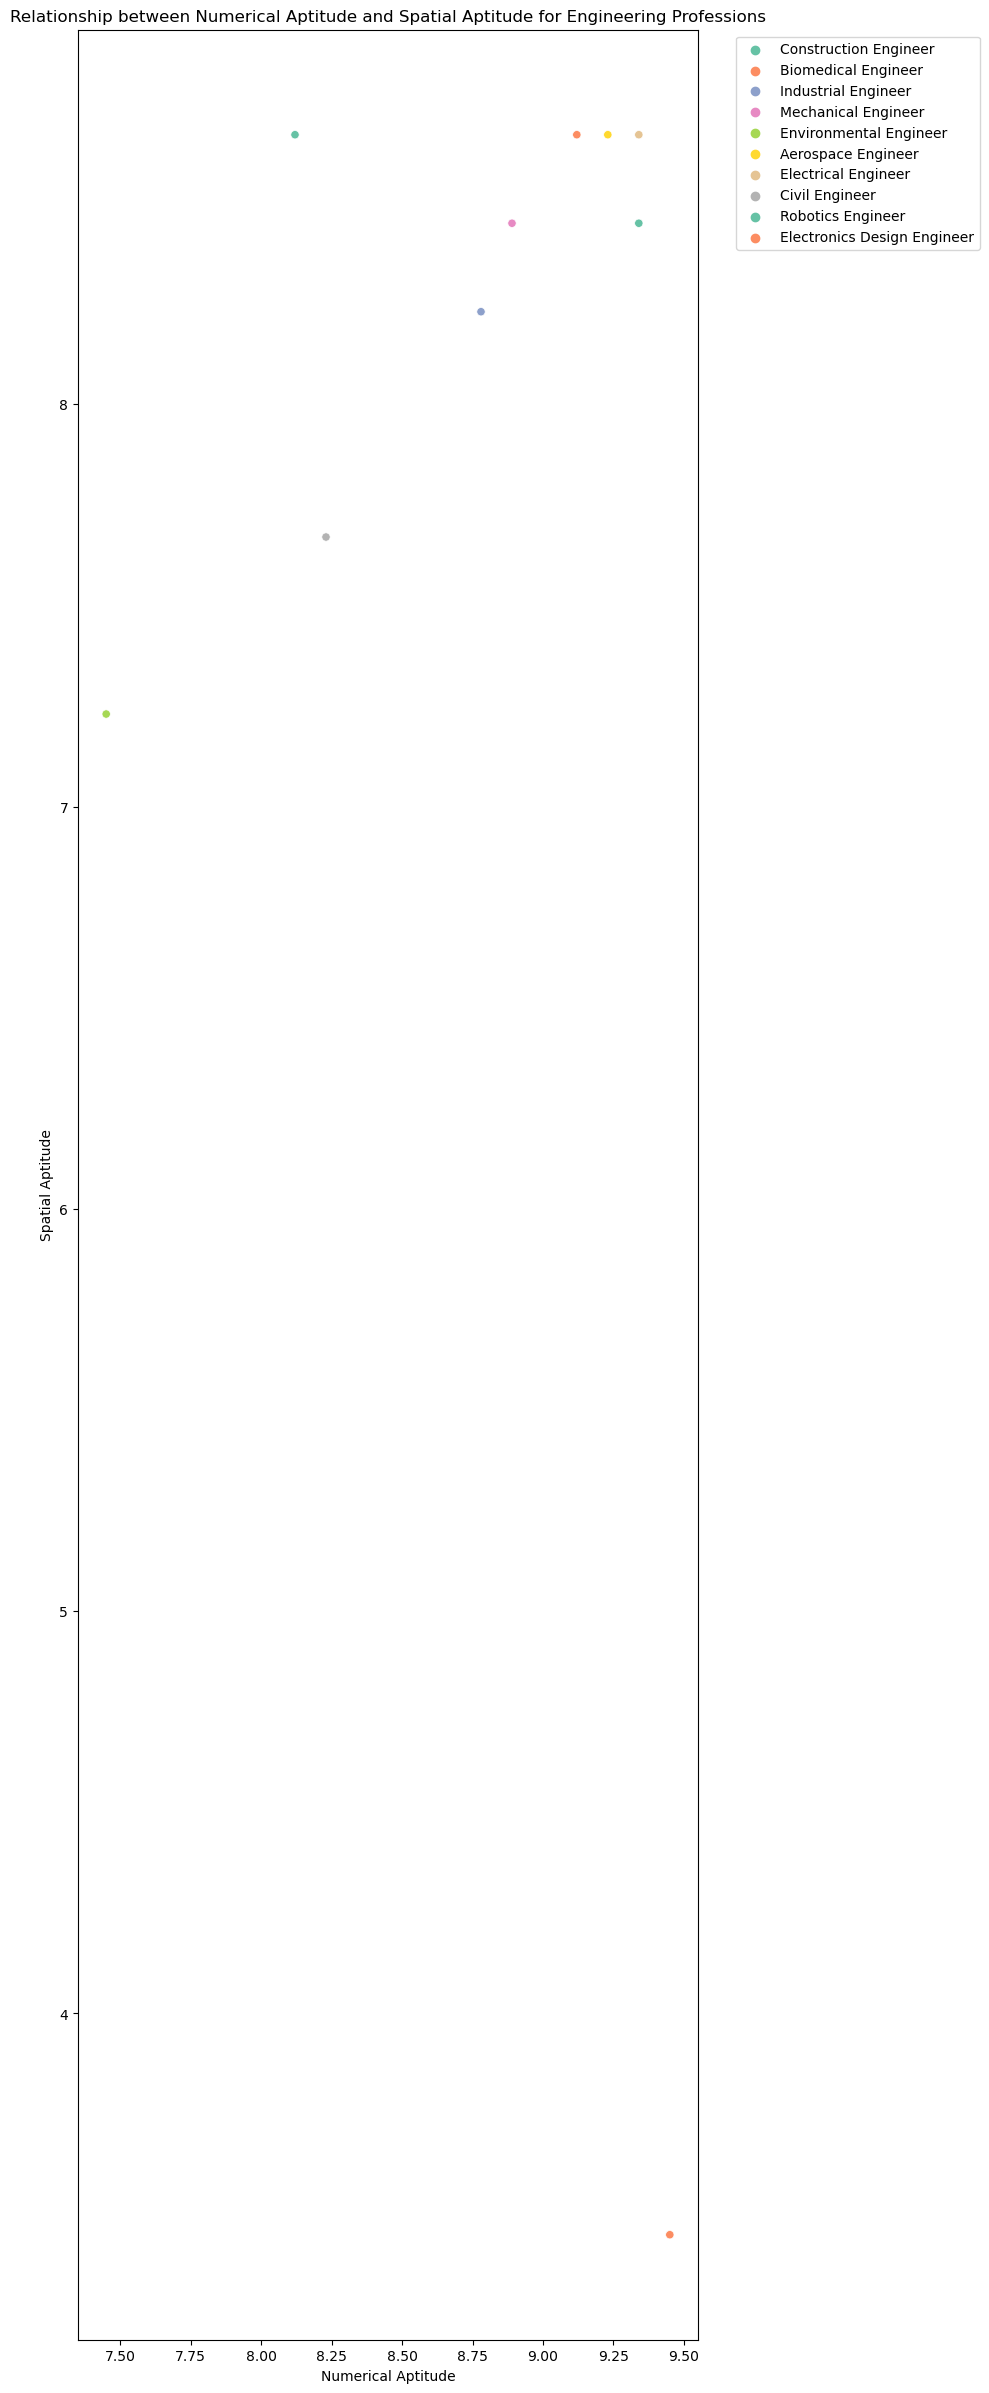

In [25]:
# Scatter plot to visualize relationship between Numerical Aptitude and Spatial Aptitude
plt.figure(figsize = (8, 30))
sns.scatterplot(x = 'Numerical Aptitude', y = 'Spatial Aptitude', data = new_dataset, hue = 'Career', palette = 'Set2')
plt.title('Relationship between Numerical Aptitude and Spatial Aptitude for Engineering Professions')
plt.xlabel('Numerical Aptitude')
plt.ylabel('Spatial Aptitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

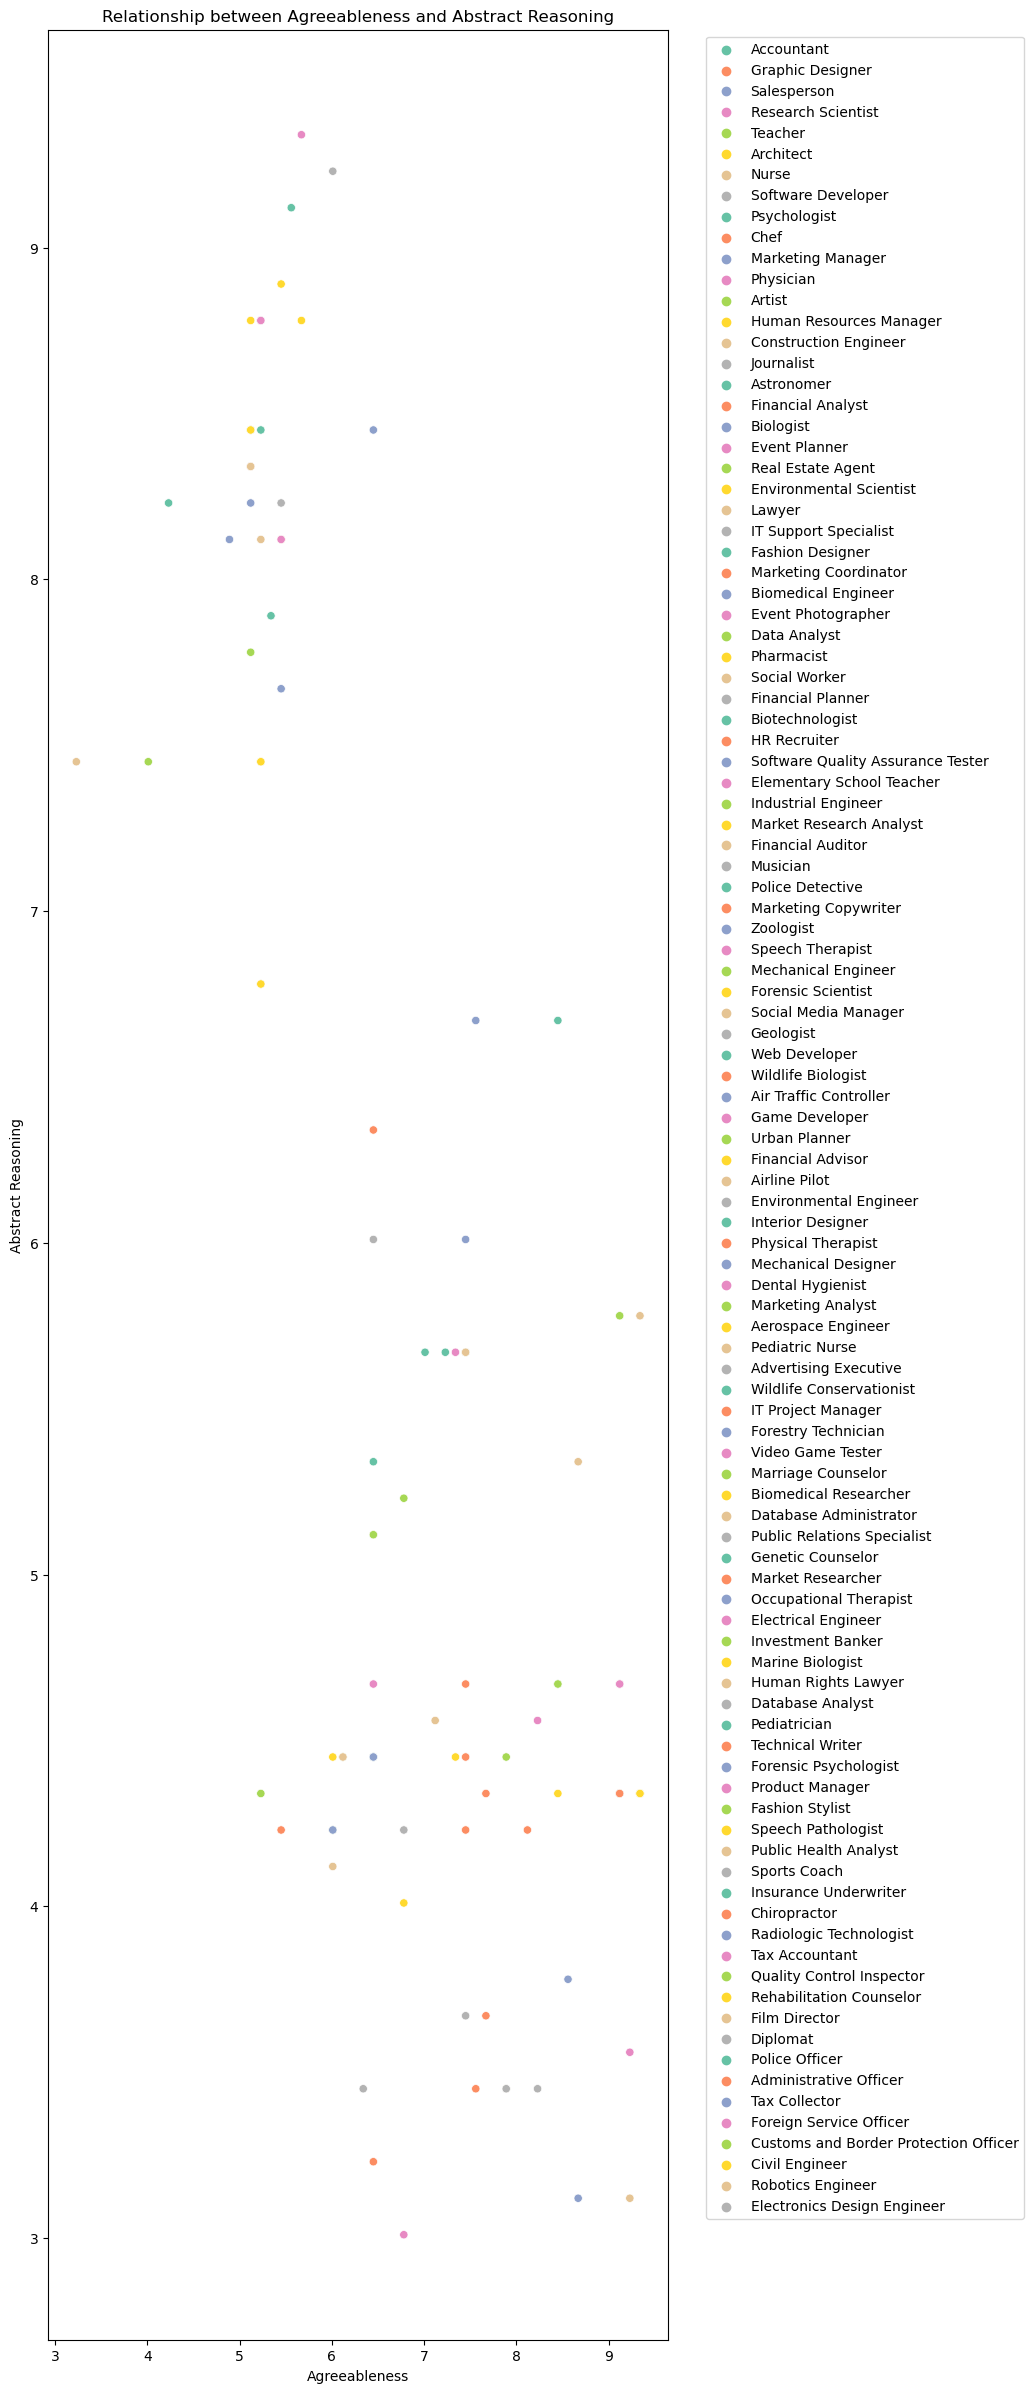

In [26]:
# Scatter plot to visualize relationship between Numerical Aptitude and Spatial Aptitude
plt.figure(figsize = (8, 30))
sns.scatterplot(x = 'A_score', y = 'Abstract Reasoning', data = career_prediction_dataset, hue = 'Career', palette = 'Set2')
plt.title('Relationship between Agreeableness and Abstract Reasoning')
plt.xlabel('Agreeableness')
plt.ylabel('Abstract Reasoning')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
word_outlier = 'Environmental'
filtered_data = new_dataset[new_dataset['Career'].str.contains(word_outlier, case = False, na = False)]

df = new_dataset[~new_dataset.apply(lambda row: row.astype(str).str.contains(word_outlier, case = False).any(), axis = 1)]

In [28]:
df

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
14,4.56,6.78,5.67,3.23,2.89,8.12,8.67,4.01,7.45,3.45,Construction Engineer
26,7.89,7.67,4.01,5.23,4.56,9.45,3.45,6.78,8.78,5.34,Biomedical Engineer
36,6.01,7.34,4.01,5.23,4.67,8.78,8.23,6.78,7.45,5.45,Industrial Engineer
44,6.78,7.23,3.89,5.12,4.67,8.89,8.45,6.12,7.78,5.45,Mechanical Engineer
61,7.23,7.67,4.23,5.45,4.89,9.23,8.67,6.45,8.12,5.67,Aerospace Engineer
76,7.23,7.67,4.23,5.45,4.89,9.34,8.67,6.45,8.12,5.67,Electrical Engineer
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,Civil Engineer
103,7.34,7.67,4.23,5.23,4.67,9.34,8.45,6.78,8.12,5.67,Robotics Engineer
104,7.34,7.67,4.23,5.45,4.89,9.12,8.67,6.45,8.23,5.67,Electronics Design Engineer


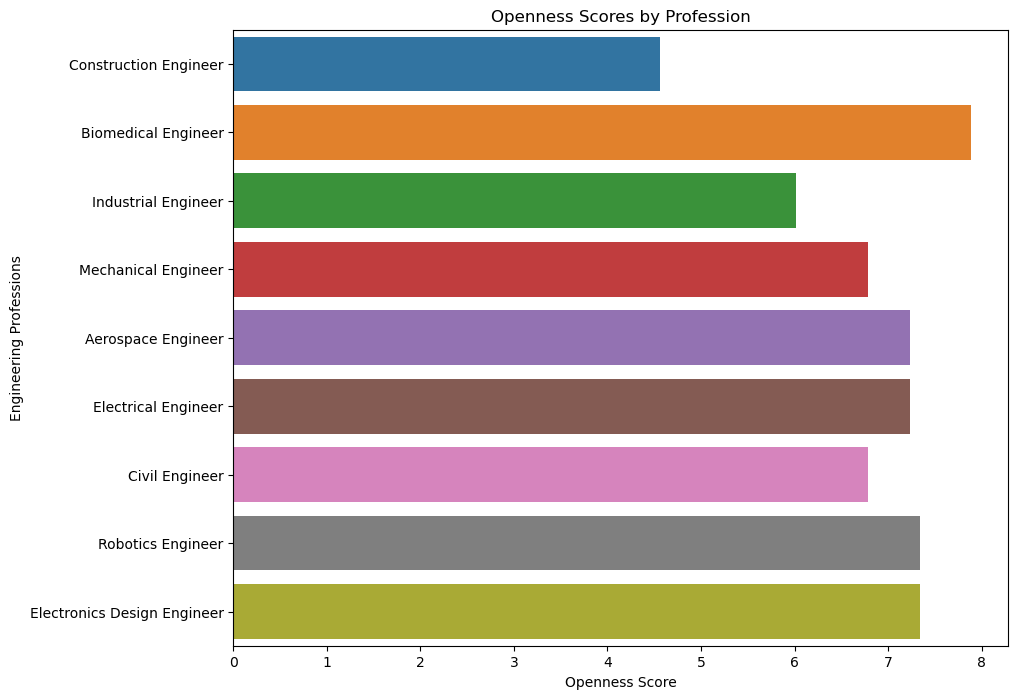

In [29]:
plt.figure(figsize = (10, 8))  # Set the figure size
sns.barplot(x = 'O_score', y = 'Career', data = df, orient = 'h')  # Create a horizontal bar plot
plt.xlabel('Openness Score')  # Label for the x-axis
plt.ylabel('Engineering Professions')  # Label for the y-axis
plt.title('Openness Scores by Profession')  # Plot title
plt.show()  # Display the plot

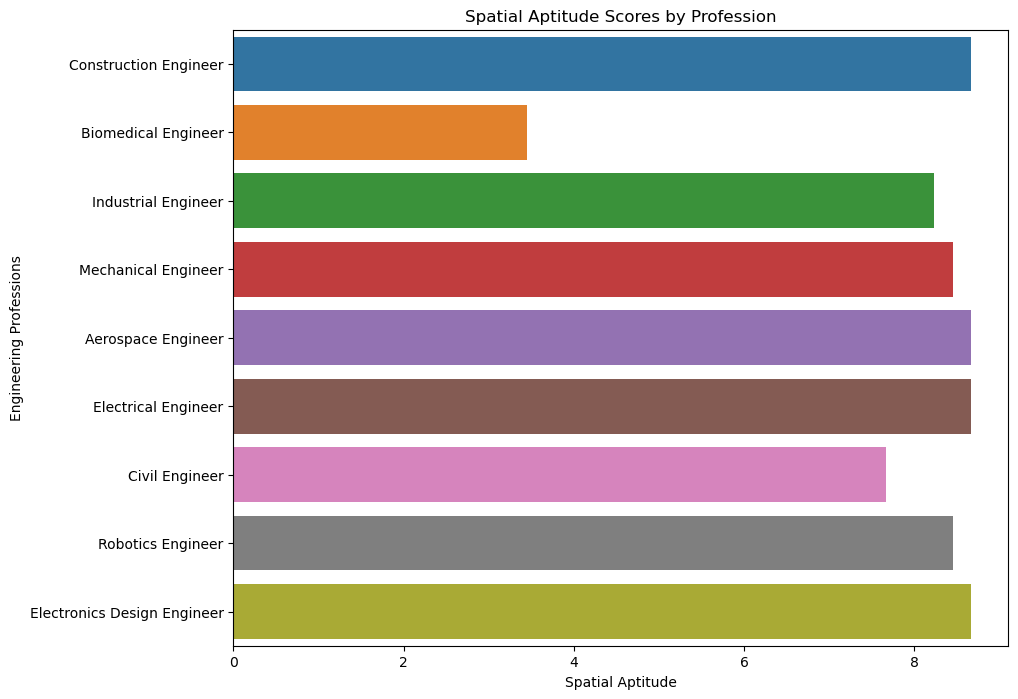

In [30]:
plt.figure(figsize = (10, 8))  # Set the figure size
sns.barplot(x = 'Spatial Aptitude', y = 'Career', data = df, orient = 'h')  # Create a horizontal bar plot
plt.xlabel('Spatial Aptitude')  # Label for the x-axis
plt.ylabel('Engineering Professions')  # Label for the y-axis
plt.title('Spatial Aptitude Scores by Profession')  # Plot title
plt.show()  # Display the plot

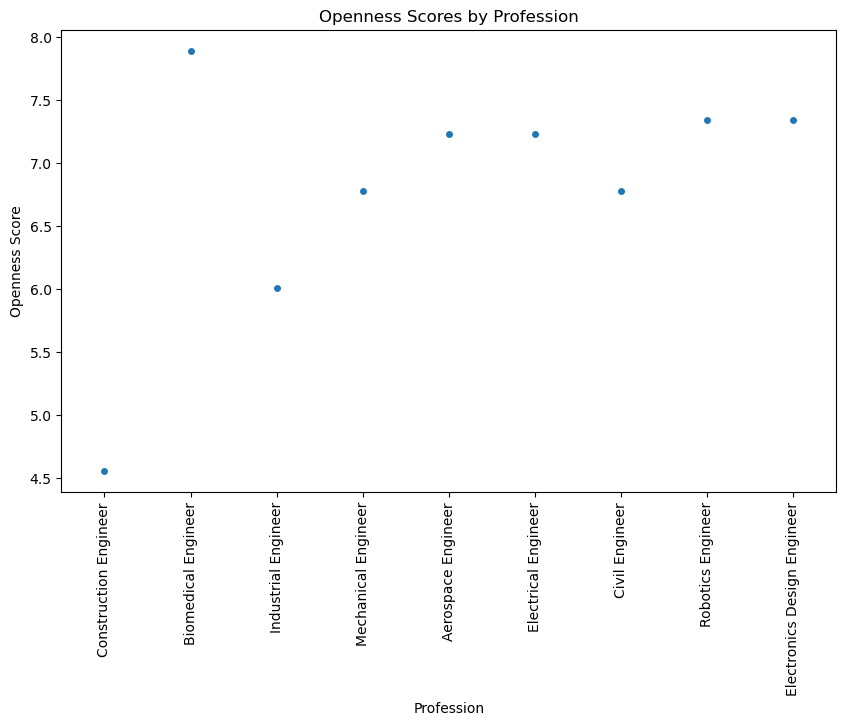

In [31]:
plt.figure(figsize=(10, 6))
sns.stripplot(x = 'Career', y = 'O_score', data = df, jitter = True)
plt.xlabel('Profession')
plt.ylabel('Openness Score')
plt.title('Openness Scores by Profession')
plt.xticks(rotation = 90)
plt.show()

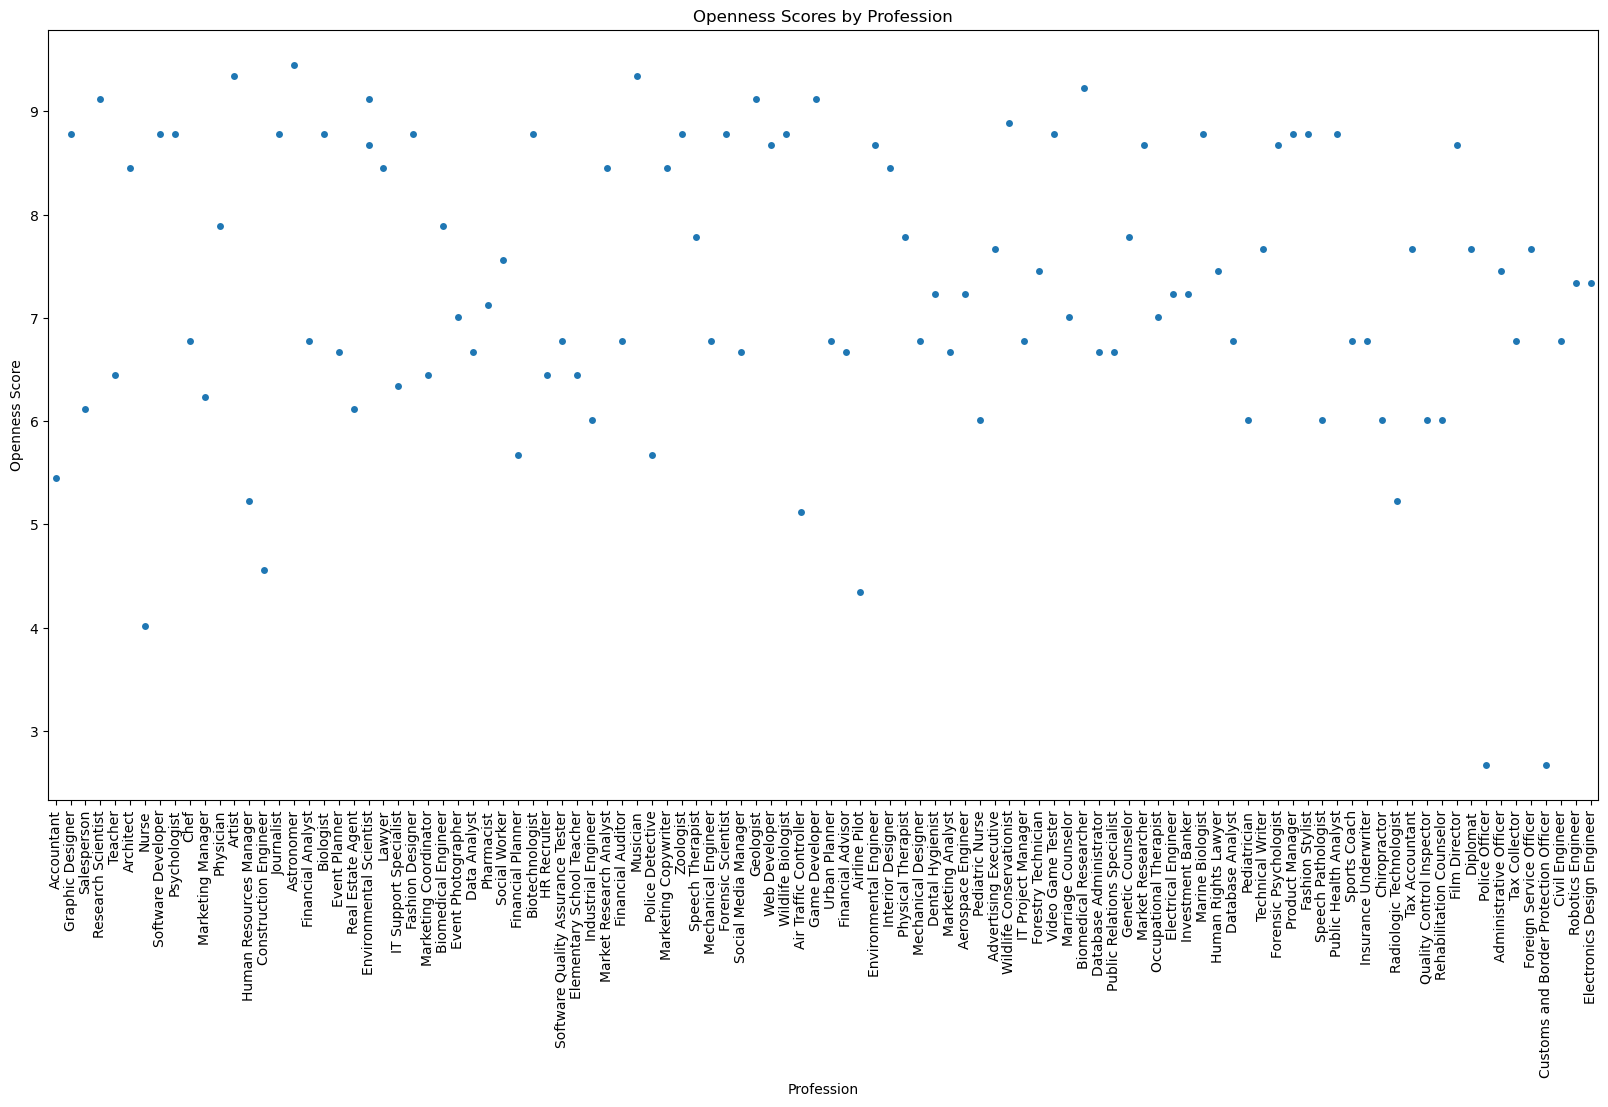

In [32]:
plt.figure(figsize=(20, 10))
sns.stripplot(x = 'Career', y = 'O_score', data = career_prediction_dataset, jitter = True)
plt.xlabel('Profession')
plt.ylabel('Openness Score')
plt.title('Openness Scores by Profession')
plt.xticks(rotation = 90)
plt.show()

## Spam Detection

In [33]:
spam_dataset = pd.read_csv("spam.csv", encoding = 'latin1', usecols = [0, 1], names = ["category", "message"], skiprows = 1)

In [34]:
spam_dataset

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [35]:
spam_dataset.message.sample(10) 

3438    awesome, how do I deal with the gate? Charles ...
2898    Aight, I should be there by 8 at the latest, p...
5180    Babe! I fucking love you too !! You know? Fuck...
3154                                                Ok...
2875    Fuck cedar key and fuck her (come over anyway ...
499                               Dear i have reache room
161     New car and house for my parents.:)i have only...
1793              You bad girl. I can still remember them
4597    I'm stuck in da middle of da row on da right h...
393     Yes i think so. I am in office but my lap is i...
Name: message, dtype: object

In [36]:
spam_dataset.category.value_counts()

category
ham     4825
spam     747
Name: count, dtype: int64

In [37]:
spam_dataset.category.value_counts() / len(spam_dataset)

category
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [38]:
spam_dataset.message.str.len().value_counts()

message
22     123
24     100
32      96
23      94
26      87
      ... 
234      1
461      1
295      1
242      1
273      1
Name: count, Length: 274, dtype: int64

In [39]:
spam_dataset.message[spam_dataset.message.str.len() == 22].value_counts()

message
Sorry, I'll call later    30
Are you this much buzy     3
i dnt wnt to tlk wid u     2
R u in this continent?     1
Erutupalam thandiyachu     1
                          ..
Are you wet right now?     1
;-( oh well, c u later     1
DO NOT B LATE LOVE MUM     1
At 7 we will go ok na.     1
Thanx a lot 4 ur help!     1
Name: count, Length: 91, dtype: int64

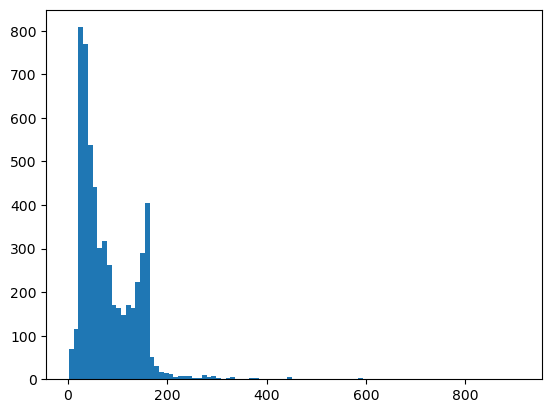

In [40]:
plt.hist(spam_dataset.message.str.len(), bins = "fd")
plt.show()

In [41]:
spam_dataset.message.str.len().skew()

2.5128976727206522

In [42]:
Counter(spam_dataset.loc[0].message.lower().split(" "))

Counter({'go': 1,
         'until': 1,
         'jurong': 1,
         'point,': 1,
         'crazy..': 1,
         'available': 1,
         'only': 1,
         'in': 1,
         'bugis': 1,
         'n': 1,
         'great': 1,
         'world': 1,
         'la': 1,
         'e': 1,
         'buffet...': 1,
         'cine': 1,
         'there': 1,
         'got': 1,
         'amore': 1,
         'wat...': 1})

In [43]:
spam_dataset.loc[0].message.split(" ")

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [44]:
counter = CountVectorizer(strip_accents = "unicode")

In [45]:
counter.fit(spam_dataset.message)

CountVectorizer(strip_accents='unicode')

In [46]:
word_counts = counter.transform(spam_dataset.message)

In [47]:
model = MultinomialNB()

In [48]:
model.fit(word_counts, spam_dataset.category)

MultinomialNB()

In [49]:
model.score(word_counts, spam_dataset.category)

0.9935391241923905

In [50]:
samples = spam_dataset.sample(20)

In [51]:
predictions = model.predict(counter.transform(samples.message))

In [52]:
samples.category

2423     ham
2402     ham
2211     ham
2266    spam
2349     ham
1972     ham
3737     ham
4032     ham
2504     ham
2170     ham
4725     ham
3437     ham
4231     ham
1209     ham
4200     ham
5534     ham
2740     ham
1142     ham
1862     ham
5377    spam
Name: category, dtype: object

In [37]:
(predictions == samples.category).sum() / len(samples)

1.0